In [1]:
import pandas as pd
import numpy as np

In [2]:
archivo = ('DatosVino(in).csv')

In [3]:
df = pd.read_csv(archivo)

**Solicitud del cliente:** 

Dos modelos:

1. Predecir el precio de la botella a partir de los datos del vino.
2. Ver la calidad de las botellas.

In [4]:
df.isnull().sum()

ID                  0
Beneficio           0
Compra              0
Acidez              0
AcidoCitrico        0
pH                  0
CloruroSodico       0
Densidad            0
Azucar              0
Sulfatos          604
Alcohol             0
Etiqueta            0
CalifProductor      0
Clasificacion       0
Region            107
PrecioBotella       0
dtype: int64

In [5]:
df.duplicated().sum()

0

Columnas analisis de cada una.

In [6]:
df['Clasificacion'].unique()

array(['?', '*', '**', '***', '****'], dtype=object)

In [7]:
df['Clasificacion'].value_counts()

Clasificacion
**      1754
?       1680
*       1535
***     1074
****     322
Name: count, dtype: int64

Clasificación obtenida por un equipo de expertos (toma 4 valores, siendo los extremos “ **** ” = “excelente” y  “ * ” = “pobre”)
entonces seria del 1 al 4 

In [8]:
df['Clasificacion'] = df['Clasificacion'].apply(lambda x: None if x == '?' else (1 if x == '*' else (2 if x == '**' else (3 if x == '***' else 4))))


In [9]:
df['Clasificacion'].value_counts()

Clasificacion
2.0    1754
1.0    1535
3.0    1074
4.0     322
Name: count, dtype: int64

In [10]:
df.isnull().sum()

ID                   0
Beneficio            0
Compra               0
Acidez               0
AcidoCitrico         0
pH                   0
CloruroSodico        0
Densidad             0
Azucar               0
Sulfatos           604
Alcohol              0
Etiqueta             0
CalifProductor       0
Clasificacion     1680
Region             107
PrecioBotella        0
dtype: int64

Eliminar las filas con valores faltantes en la columna 'Region'

In [11]:
df = df.dropna(subset=['Region'])

In [12]:
df.shape

(6258, 16)

In [13]:
df_seg =df.copy()

Imputación por la media (mean imputation)

In [14]:
df['Sulfatos'] = df['Sulfatos'].fillna(df['Sulfatos'].mean())


In [15]:
df.isnull().sum()

ID                   0
Beneficio            0
Compra               0
Acidez               0
AcidoCitrico         0
pH                   0
CloruroSodico        0
Densidad             0
Azucar               0
Sulfatos             0
Alcohol              0
Etiqueta             0
CalifProductor       0
Clasificacion     1650
Region               0
PrecioBotella        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6258 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6258 non-null   int64  
 1   Beneficio       6258 non-null   int64  
 2   Compra          6258 non-null   int64  
 3   Acidez          6258 non-null   float64
 4   AcidoCitrico    6258 non-null   float64
 5   pH              6258 non-null   float64
 6   CloruroSodico   6258 non-null   float64
 7   Densidad        6258 non-null   float64
 8   Azucar          6258 non-null   float64
 9   Sulfatos        6258 non-null   float64
 10  Alcohol         6258 non-null   float64
 11  Etiqueta        6258 non-null   object 
 12  CalifProductor  6258 non-null   int64  
 13  Clasificacion   4608 non-null   float64
 14  Region          6258 non-null   float64
 15  PrecioBotella   6258 non-null   float64
dtypes: float64(11), int64(4), object(1)
memory usage: 831.1+ KB


Columna Etiqueta

In [17]:
df["Etiqueta"].unique()


array(['B', 'R', 'M', 'r', 'MB', 'b', 'MM', 'mb', 'm', 'mm'], dtype=object)

Normalización 

In [18]:
df['Etiqueta'] = df['Etiqueta'].str.upper()


Mapeo Categórico
Mapeo Categórico: Esta técnica implica la creación de un diccionario de mapeo que asocia cada categoría con un valor numérico. Posteriormente, los valores de la columna categórica se reemplazan utilizando este diccionario.

In [19]:
# Definir el orden de las categorías
orden_categorias = ['MM', 'M', 'R', 'B', 'MB']

In [20]:
# Crear un diccionario de mapeo de categorías a números
mapa_categorias = {categoria: indice for indice, categoria in enumerate(orden_categorias)}

Codificación Ordinal
Codificación Ordinal: Este término es más específico y se refiere a la asignación de valores numéricos a categorías que tienen un orden intrínseco. En tu ejemplo, las categorías ['MM', 'M', 'R', 'B', 'MB'] tienen un orden específico que se mantiene al asignarles valores numéricos.

In [21]:
# Reemplazar los valores de la columna 'A' usando el diccionario de mapeo
df['Etiqueta'] = df['Etiqueta'].map(mapa_categorias)
df['Etiqueta'].unique()

array([3, 2, 1, 4, 0], dtype=int64)

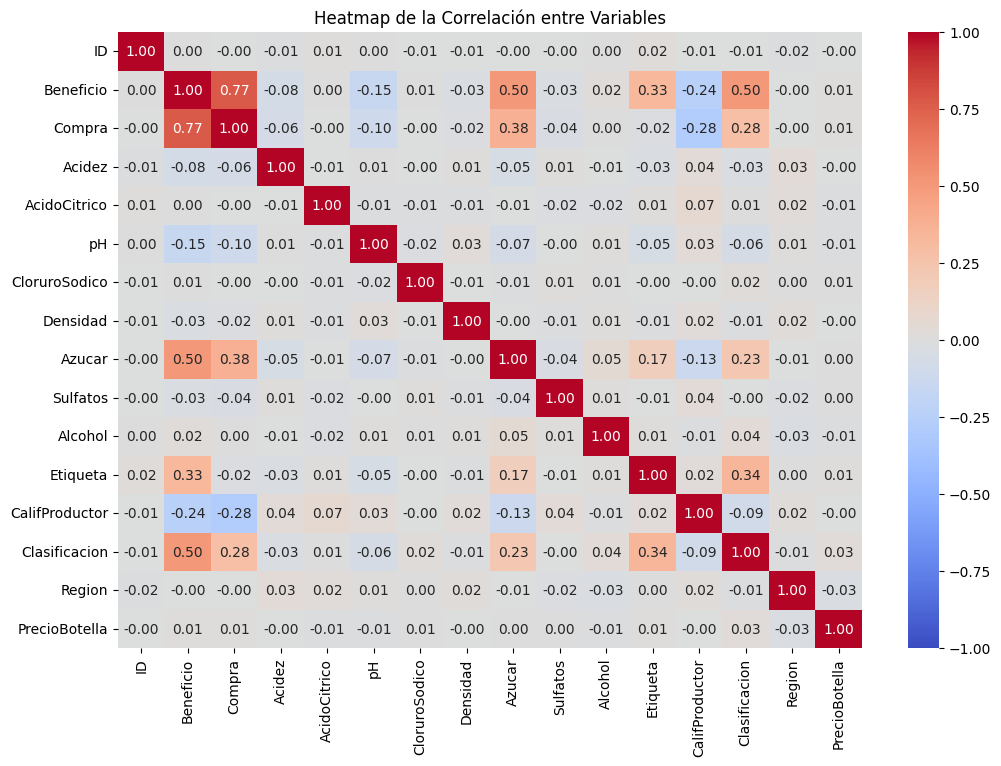

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de la Correlación entre Variables')
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6258 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6258 non-null   int64  
 1   Beneficio       6258 non-null   int64  
 2   Compra          6258 non-null   int64  
 3   Acidez          6258 non-null   float64
 4   AcidoCitrico    6258 non-null   float64
 5   pH              6258 non-null   float64
 6   CloruroSodico   6258 non-null   float64
 7   Densidad        6258 non-null   float64
 8   Azucar          6258 non-null   float64
 9   Sulfatos        6258 non-null   float64
 10  Alcohol         6258 non-null   float64
 11  Etiqueta        6258 non-null   int64  
 12  CalifProductor  6258 non-null   int64  
 13  Clasificacion   4608 non-null   float64
 14  Region          6258 non-null   float64
 15  PrecioBotella   6258 non-null   float64
dtypes: float64(11), int64(5)
memory usage: 831.1 KB


Cambio de tipo de datos

In [24]:
df['Region'] = df['Region'].astype('int8')
df['Compra'] = df['Compra'].astype('int8')
df['CalifProductor'] = df['CalifProductor'].astype('int8')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6258 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6258 non-null   int64  
 1   Beneficio       6258 non-null   int64  
 2   Compra          6258 non-null   int8   
 3   Acidez          6258 non-null   float64
 4   AcidoCitrico    6258 non-null   float64
 5   pH              6258 non-null   float64
 6   CloruroSodico   6258 non-null   float64
 7   Densidad        6258 non-null   float64
 8   Azucar          6258 non-null   float64
 9   Sulfatos        6258 non-null   float64
 10  Alcohol         6258 non-null   float64
 11  Etiqueta        6258 non-null   int64  
 12  CalifProductor  6258 non-null   int8   
 13  Clasificacion   4608 non-null   float64
 14  Region          6258 non-null   int8   
 15  PrecioBotella   6258 non-null   float64
dtypes: float64(10), int64(3), int8(3)
memory usage: 702.8 KB


In [26]:
df['Beneficio'].value_counts()

Beneficio
0       1341
516       20
534       18
568       18
477       17
        ... 
1163       1
1107       1
1189       1
964        1
1105       1
Name: count, Length: 978, dtype: int64

In [27]:
df["Beneficio"].value_counts(100)*100 # Sacamos el procentaje

Beneficio
0       21.428571
516      0.319591
534      0.287632
568      0.287632
477      0.271652
          ...    
1163     0.015980
1107     0.015980
1189     0.015980
964      0.015980
1105     0.015980
Name: proportion, Length: 978, dtype: float64

<!-- Binarización: Este proceso convierte los valores de la columna 'Beneficio' en valores binarios (0 y 1), -->

In [28]:
# df['Beneficio'] = df['Beneficio'].apply(lambda x: 1 if x != 0 else 0)

In [29]:
df['Beneficio'].sort_values(ascending=False)

1845    1568
1846    1399
1847    1383
1848    1382
1849    1381
        ... 
5456       0
5455       0
5454       0
5453       0
6364       0
Name: Beneficio, Length: 6258, dtype: int64

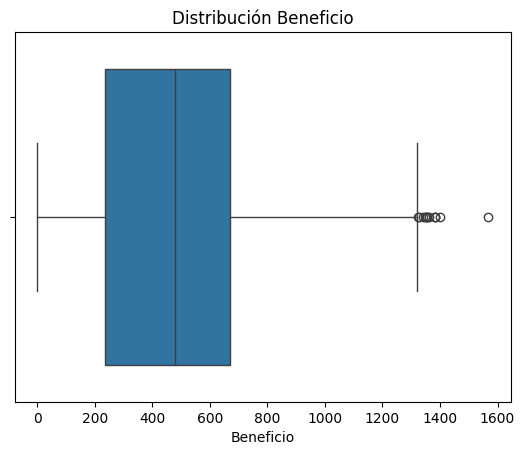

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.boxplot(x=df['Beneficio'])
plt.title('Distribución Beneficio')
plt.show()

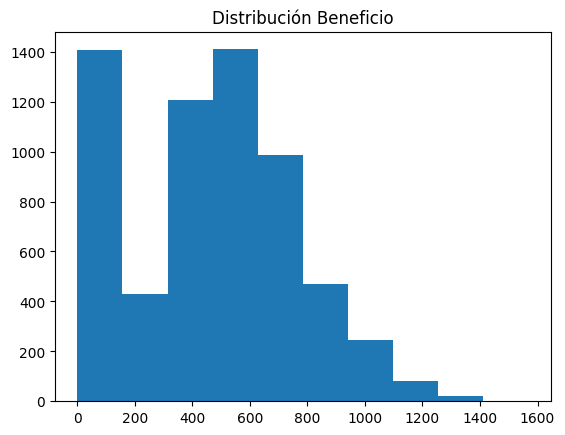

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.hist(x=df['Beneficio'])
plt.title('Distribución Beneficio')
plt.show()

Normalización: 

Escalar los datos para que estén en un rango específico puede ser importante 
para algunos algoritmos de machine learning que son sensibles a las escalas de los datos.

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
df["Beneficio"] = scaler.fit_transform(df[["Beneficio"]])

In [33]:
df["Beneficio"].sort_values()

0       0.000000
5685    0.000000
5684    0.000000
5683    0.000000
5682    0.000000
          ...   
1849    0.880740
1848    0.881378
1847    0.882015
1846    0.892219
1845    1.000000
Name: Beneficio, Length: 6258, dtype: float64

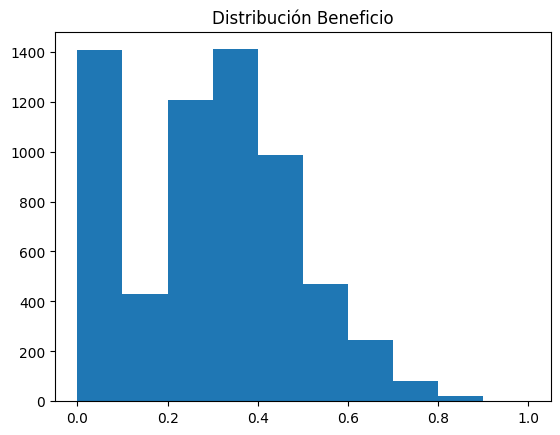

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.hist(x=df['Beneficio'])
plt.title('Distribución Beneficio')
plt.show()

<!-- Columna Etiqueta
df["Etiqueta"].unique()
Normalización 
df['Etiqueta'] = df['Etiqueta'].str.upper()
Mapeo Categórico
Mapeo Categórico: Esta técnica implica la creación de un diccionario de mapeo que asocia cada categoría con un valor numérico. Posteriormente, los valores de la columna categórica se reemplazan utilizando este diccionario.
# # Definir el orden de las categorías
# orden_categorias = ['MM', 'M', 'R', 'B', 'MB']
 
# # Crear un diccionario de mapeo de categorías a números
# mapa_categorias = {categoria: indice for indice, categoria in enumerate(orden_categorias)}
Codificación Ordinal
Codificación Ordinal: Este término es más específico y se refiere a la asignación de valores numéricos a categorías que tienen un orden intrínseco. En tu ejemplo, las categorías ['MM', 'M', 'R', 'B', 'MB'] tienen un orden específico que se mantiene al asignarles valores numéricos.
# Reemplazar los valores de la columna 'A' usando el diccionario de mapeo
df['Etiqueta'] = df['Etiqueta'].map(mapa_categorias)
df['Etiqueta'].unique() -->

Densidad y azúcar: sólo valores positivos

In [35]:
df["Densidad"].min()

0.88809

In [36]:
df["Azucar"].min()

0.0

El PH debe estar entre 4 y 10

In [37]:
print(df["pH"].min())
print(df["pH"].max())

4.8
9.3


Contenido de alcohol en % (debe situarse entre 0 y 100)

In [38]:
print(df['Alcohol'].min())
print(df['Alcohol'].max())

-4.5
150.0


In [39]:
df['Alcohol'] = df['Alcohol'].apply(lambda x: None if x > 100 else x)
df['Alcohol'] = df['Alcohol'].apply(lambda x: None if x < 0 else x)

In [40]:
df['Clasificacion'].unique()

array([nan,  1.,  2.,  3.,  4.])

In [41]:
df.isnull().sum()

ID                   0
Beneficio            0
Compra               0
Acidez               0
AcidoCitrico         0
pH                   0
CloruroSodico        0
Densidad             0
Azucar               0
Sulfatos             0
Alcohol            382
Etiqueta             0
CalifProductor       0
Clasificacion     1650
Region               0
PrecioBotella        0
dtype: int64

KNN Imputation es una técnica para manejar valores faltantes en un conjunto de datos

In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
keyColums =[ 'Alcohol','Clasificacion']
df[keyColums]=imputer.fit_transform(df[keyColums])

In [43]:
df.duplicated().sum()

0

In [44]:
df.columns

Index(['ID', 'Beneficio', 'Compra', 'Acidez', 'AcidoCitrico', 'pH',
       'CloruroSodico', 'Densidad', 'Azucar', 'Sulfatos', 'Alcohol',
       'Etiqueta', 'CalifProductor', 'Clasificacion', 'Region',
       'PrecioBotella'],
      dtype='object')

In [45]:
df.drop(columns='ID', inplace=True)

In [46]:
df.duplicated().sum()

0

In [47]:
df.isnull().sum()

Beneficio         0
Compra            0
Acidez            0
AcidoCitrico      0
pH                0
CloruroSodico     0
Densidad          0
Azucar            0
Sulfatos          0
Alcohol           0
Etiqueta          0
CalifProductor    0
Clasificacion     0
Region            0
PrecioBotella     0
dtype: int64

In [48]:
df.isna().sum()

Beneficio         0
Compra            0
Acidez            0
AcidoCitrico      0
pH                0
CloruroSodico     0
Densidad          0
Azucar            0
Sulfatos          0
Alcohol           0
Etiqueta          0
CalifProductor    0
Clasificacion     0
Region            0
PrecioBotella     0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6258 entries, 0 to 6364
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Beneficio       6258 non-null   float64
 1   Compra          6258 non-null   int8   
 2   Acidez          6258 non-null   float64
 3   AcidoCitrico    6258 non-null   float64
 4   pH              6258 non-null   float64
 5   CloruroSodico   6258 non-null   float64
 6   Densidad        6258 non-null   float64
 7   Azucar          6258 non-null   float64
 8   Sulfatos        6258 non-null   float64
 9   Alcohol         6258 non-null   float64
 10  Etiqueta        6258 non-null   int64  
 11  CalifProductor  6258 non-null   int8   
 12  Clasificacion   6258 non-null   float64
 13  Region          6258 non-null   int8   
 14  PrecioBotella   6258 non-null   float64
dtypes: float64(11), int64(1), int8(3)
memory usage: 653.9 KB


Guardar csv normalizado y transformado 

In [50]:
df.to_csv('Vino_normalizado.csv', index=False)

Calcular la matriz de correlación

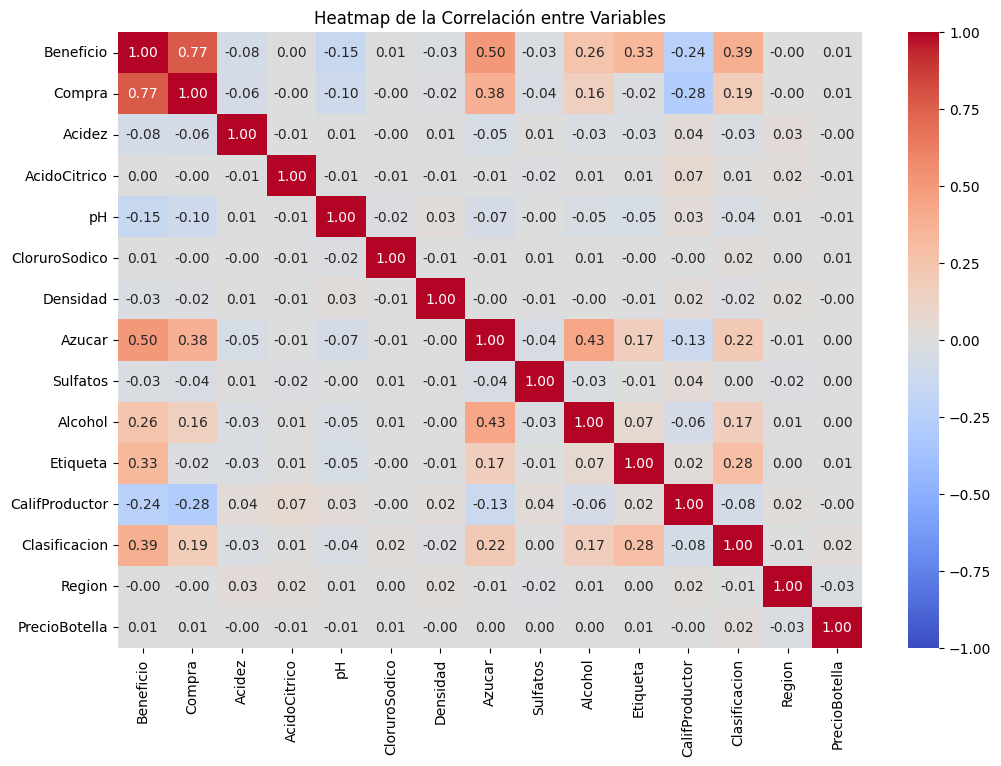

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de la Correlación entre Variables')
plt.show()


Clasificacion correlacion positiva con [['Beneficio', 'Compra','Azucar','Alcohol', 'Etiqueta']]

El propósito de esta operación generalmente está relacionado
con la preparación de datos para el entrenamiento de modelos de machine learning. 

## División de los Datos

In [52]:
X = df.iloc[:, :-1]
y = df['PrecioBotella']
#y = df['Clasificacion']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

## Entrenamiento y Evaluación de Modelos

#### Linear Regression con KFold Cross-Validation
KFold Cross-Validation: cuando se requiere una evaluación más robusta y confiable del modelo, especialmente útil con un conjunto de datos pequeño o si es necesario validar la estabilidad del modelo.

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Linear Regression con KFold Cross-Validation
model = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Cross-Validation MSE (Linear Regression):", -results.mean())


Cross-Validation MSE (Linear Regression): 2.1942818561151745


El MSE de 2.19 es un buen punto de partida, pero siempre hay margen para mejorar.

### LinearRegression
Train-Test Split:para una evaluación rápida y sencilla, especialmente en las primeras etapas del desarrollo del modelo o cuando se tiene un conjunto de datos grande y bien balanceado.

In [54]:
# Entrenar el modelo de regresión lineal
clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lr = mean_absolute_percentage_error(y_test, y_pred)

print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, MAPE: {mape_lr}")


Linear Regression - MSE: 2.067912083466897, MAE: 1.1624834722766404, MAPE: 57.27234591032219


Las métricas del modelo de regresión lineal muestran un MSE de 2.0679 y un MAE de 1.1625, lo que indica errores moderados en las predicciones. Sin embargo, un MAPE del 57.27% sugiere que el modelo tiene dificultades significativas para hacer predicciones precisas en términos relativos, señalando la necesidad de mejorar el modelo.

### RandomForest

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo RandomForest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, MAPE: {mape_rf}")


Random Forest - MSE: 2.13334385528754, MAE: 1.1872507987220449, MAPE: 60.02876271306652


Los resultados del modelo Random Forest muestran un MSE de 2.1381, un MAE de 1.1905 y un MAPE de 59.82%, similares a los de la regresión lineal, indicando que el modelo no ha mejorado significativamente las predicciones

## GradientBoosting

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenar el modelo GradientBoosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, MAE: {mae_gb}, MAPE: {mape_gb}")


Gradient Boosting - MSE: 2.107059420978619, MAE: 1.169931669917296, MAPE: 57.536961105626105


Los resultados similares a través de diferentes modelos sugieren que hay características en los datos que no están siendo capturadas adecuadamente. Podría ser necesario revisar los datos y considerar otras estrategias para mejorar el rendimiento del modelo.

### Análisis de Errores y Visualización

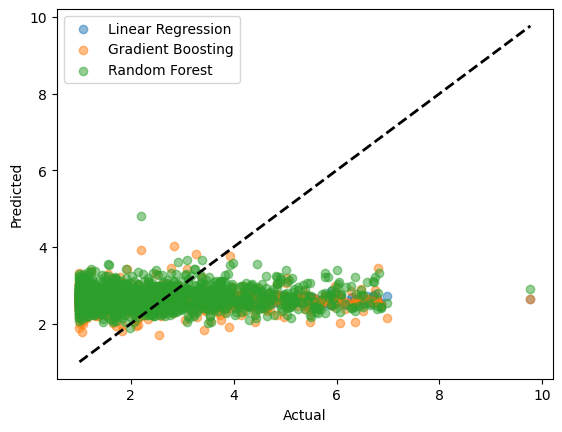

In [63]:
import matplotlib.pyplot as plt

# Scatter plot de las predicciones vs valores reales
plt.scatter(y_test, y_pred, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_gb, label='Gradient Boosting', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


El gráfico indica que ninguno de los modelos está logrando predecir con precisión los valores reales. Las predicciones tienden a subestimar los valores reales y se observa una dispersión significativa en los datos.

### Análisis de Clustering con KMeans

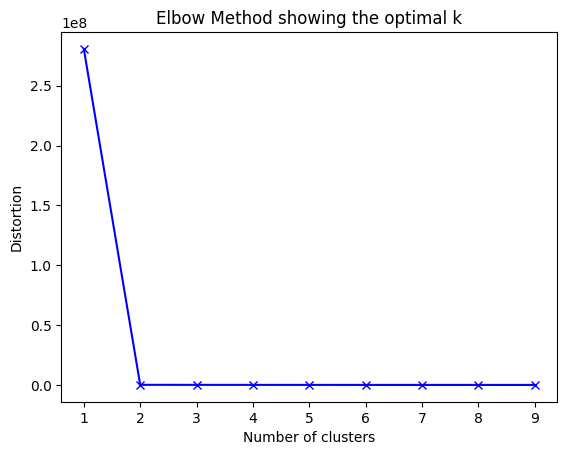

In [64]:
from sklearn.cluster import KMeans

distorsion = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10).fit(df)
    distorsion.append(kmeans.inertia_)

plt.plot(range(1, 10), distorsion, "bx-")
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method showing the optimal k')
plt.show()


### Entrenamiento de KMeans y Predicción

In [65]:
# Entrenamiento de KMeans
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X_train)

# Centroides y predicciones
centroides = kmeans.cluster_centers_
print("Centroides:", centroides)

predecir = kmeans.predict(X_test)
print("Predicciones de clusters para el conjunto de prueba:", predecir)


Centroides: [[2.88364409e-01 7.87853403e-01 3.25313089e-01 3.10588482e-01
  7.54557277e+00 5.17053403e-02 9.94416358e-01 8.87323560e+00
  5.15282195e-01 1.19555050e+01 1.97926702e+00 2.76753927e+00
  2.01367337e+00 2.01675393e+00]
 [3.03692906e-01 7.87878788e-01 2.96926407e-01 2.69307359e-01
  7.42800866e+00 9.99000000e+02 9.92610043e-01 8.73549784e+00
  5.88869712e-01 1.21427516e+01 1.99134199e+00 2.77489177e+00
  2.07686313e+00 2.03463203e+00]]
Predicciones de clusters para el conjunto de prueba: [0 1 0 ... 0 0 1]


Resumen

In [67]:
# Calcular errores absolutos
errors_lr = np.abs(y_test - y_pred)
errors_gb = np.abs(y_test - y_pred_gb)
errors_rf = np.abs(y_test - y_pred_rf)

# Mostrar estadísticas básicas de los errores
print("Errores absolutos - Linear Regression: Media =", np.mean(errors_lr), ", Desviación estándar =", np.std(errors_lr))
print("Errores absolutos - Gradient Boosting: Media =", np.mean(errors_gb), ", Desviación estándar =", np.std(errors_gb))
print("Errores absolutos - Random Forest: Media =", np.mean(errors_rf), ", Desviación estándar =", np.std(errors_rf))



Errores absolutos - Linear Regression: Media = 1.1624834722766404 , Desviación estándar = 0.8464893739147246
Errores absolutos - Gradient Boosting: Media = 1.169931669917296 , Desviación estándar = 0.859255089425222
Errores absolutos - Random Forest: Media = 1.1872507987220449 , Desviación estándar = 0.850752253139189


Todos los modelos tienen errores absolutos medios y desviaciones estándar bastante similares, lo que indica que ninguno de los modelos está claramente mejor que los otros en términos de error absoluto.
La desviación estándar de los errores es relativamente alta, lo que sugiere que hay una variabilidad considerable en las predicciones de los modelos.

In [68]:
from sklearn.metrics import silhouette_score

# Asumiendo que tienes el modelo KMeans entrenado y las predicciones
kmeans = KMeans(n_clusters=2, n_init=10, random_state=10)
kmeans.fit(X_train)

# Predicciones de clusters para el conjunto de prueba
cluster_labels = kmeans.predict(X_test)

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_test, cluster_labels)
print(f"Coeficiente de Silueta Promedio: {silhouette_avg}")


Coeficiente de Silueta Promedio: 0.9933717663206151


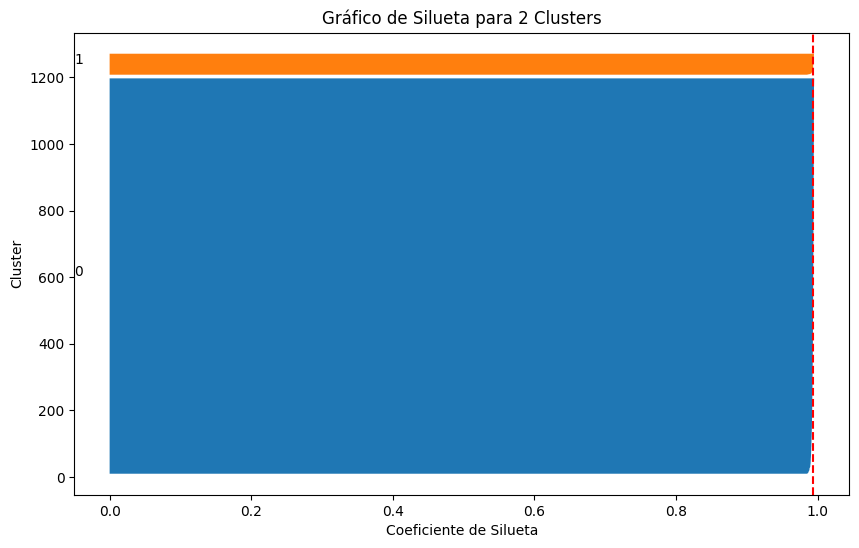

In [69]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt


# Calcular los valores de silueta para cada punto
sample_silhouette_values = silhouette_samples(X_test, cluster_labels)

# Crear el gráfico de silueta
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(2):  # para cada cluster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Cluster")
plt.title("Gráfico de Silueta para 2 Clusters")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


El alto valor del coeficiente de silueta promedio y la distribución de los puntos en el gráfico de silueta confirman que los clusters están bien formados y separados. Esto sugiere que el algoritmo KMeans con 2 clusters ha identificado una estructura natural en los datos que es coherente y significativa.